<a href="https://colab.research.google.com/github/Unravel-Pranav/Deep-Learning/blob/main/slp_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
tf.compat.v1.disable_eager_execution()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
flower_types = os.listdir('/content/drive/MyDrive/flowers')
flower_types

['rose', 'tulip']

In [19]:
import cv2
path = '/content/drive/MyDrive/flowers//'

im_size = 60

images = []
labels = []

for i in flower_types:
    data_path = path + str(i)  # entered in rose folder
    filenames = [i for i in os.listdir(data_path) if i.endswith('.jpg')]
    #print(filenames)  # will get the names of all images which ends with .jpg extension
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [20]:
labels

['rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'rose',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip']

In [21]:
images = np.array(images)
images = images.astype('float32') / 255
#images

In [22]:
images.shape

(74, 60, 60, 3)

In [23]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
x=images
y=labels
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [24]:
y=y.reshape(-1,1)
#onehotencoder = OneHotEncoder(categorical_features=[0])
#Y= onehotencoder.fit_transform(y)
#Y=Y.toarray()



from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [25]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
x,Y = shuffle(x,Y,random_state=1)

In [26]:
train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.20, random_state=415)


In [27]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(59, 60, 60, 3)
(59, 2)
(15, 60, 60, 3)
(15, 2)


In [28]:
#train_x=train_x.reshape(60*60*3)
#train_x.shape
train_x=np.reshape(train_x,(59,10800))
print(train_x.shape)

test_x=np.reshape(test_x,(15,10800))
test_x.shape


(59, 10800)


(15, 10800)

In [29]:
learning_rate = 0.01
training_epochs = 1000
n_dim=60
n_class=2


x = tf.compat.v1.placeholder(tf.float32, [None, 10800])
W = tf.Variable(tf.zeros([10800,n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.compat.v1.placeholder(tf.float32,[None,n_class]) # actual y

In [30]:
init = tf.compat.v1.global_variables_initializer()

In [31]:
pred = tf.nn.softmax(tf.matmul(x, W)+ b) # perceptron

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y_))
training_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [32]:
sess = tf.compat.v1.Session()
sess.run(init)
cost_history = []

In [33]:
for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost = sess.run(cost_function,feed_dict={x: train_x,y_: train_y})
    cost_history = np.append(cost_history,cost)
    print('epoch : ', epoch,  ' - ', 'cost: ', cost)

pred_y = sess.run(pred, feed_dict={x: test_x})

epoch :  0  -  cost:  0.46962857
epoch :  1  -  cost:  0.4695047
epoch :  2  -  cost:  0.469389
epoch :  3  -  cost:  0.46928057
epoch :  4  -  cost:  0.46917874
epoch :  5  -  cost:  0.46908292
epoch :  6  -  cost:  0.46899256
epoch :  7  -  cost:  0.4689072
epoch :  8  -  cost:  0.46882644
epoch :  9  -  cost:  0.46874997
epoch :  10  -  cost:  0.4686773
epoch :  11  -  cost:  0.46860835
epoch :  12  -  cost:  0.46854272
epoch :  13  -  cost:  0.46848017
epoch :  14  -  cost:  0.4684205
epoch :  15  -  cost:  0.46836355
epoch :  16  -  cost:  0.46830907
epoch :  17  -  cost:  0.4682569
epoch :  18  -  cost:  0.468207
epoch :  19  -  cost:  0.4681591
epoch :  20  -  cost:  0.46811315
epoch :  21  -  cost:  0.46806902
epoch :  22  -  cost:  0.46802658
epoch :  23  -  cost:  0.46798575
epoch :  24  -  cost:  0.46794638
epoch :  25  -  cost:  0.4679085
epoch :  26  -  cost:  0.46787196
epoch :  27  -  cost:  0.4678367
epoch :  28  -  cost:  0.4678027
epoch :  29  -  cost:  0.46776986
epo

In [38]:
pred_y = sess.run(pred, feed_dict={x: test_x})


In [39]:
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
test_accuracy = sess.run(accuracy, feed_dict={x: test_x, y_: test_y})
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.8


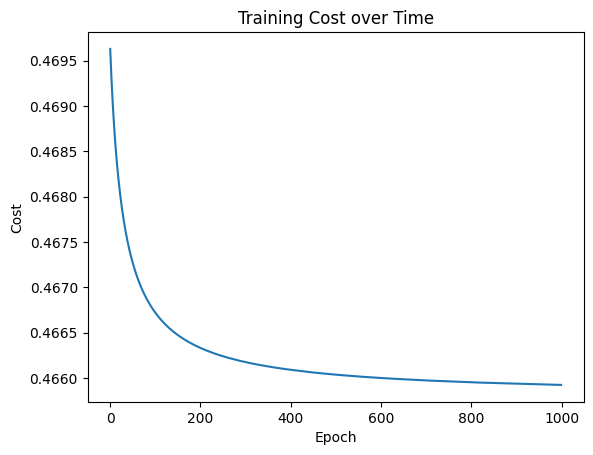

In [40]:
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Training Cost over Time')
plt.show()


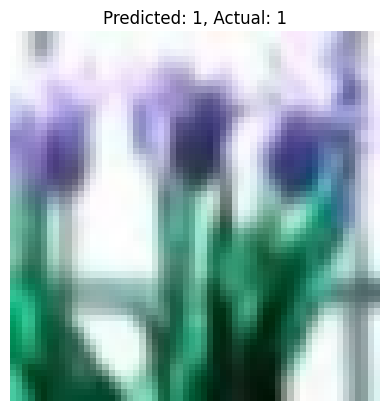

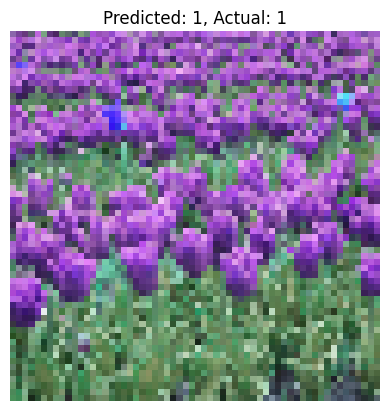

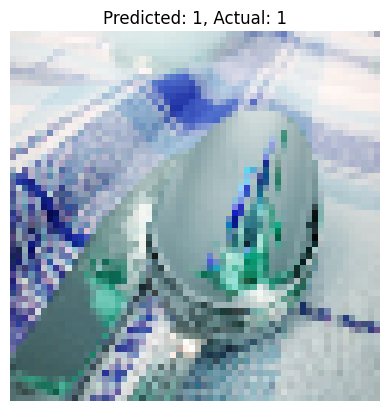

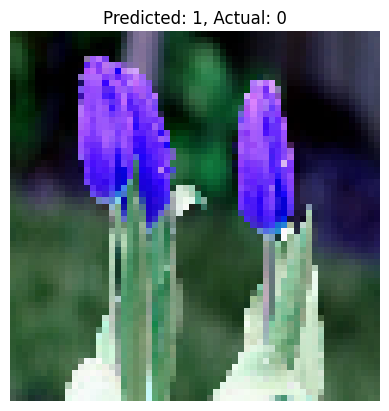

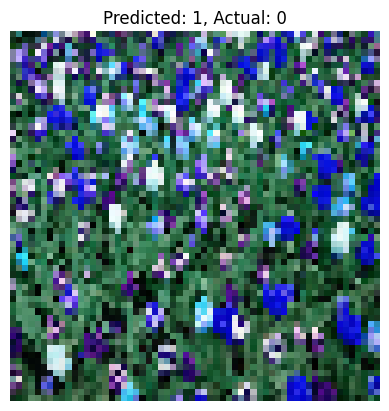

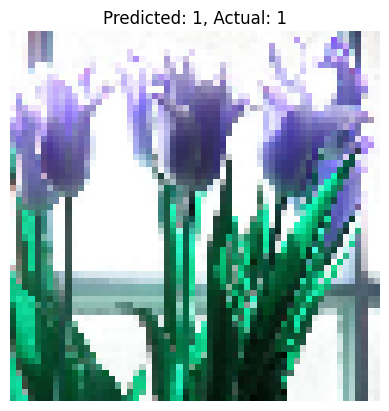

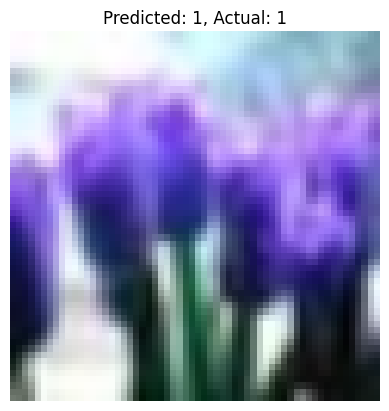

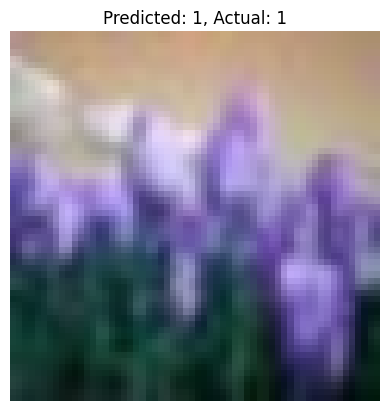

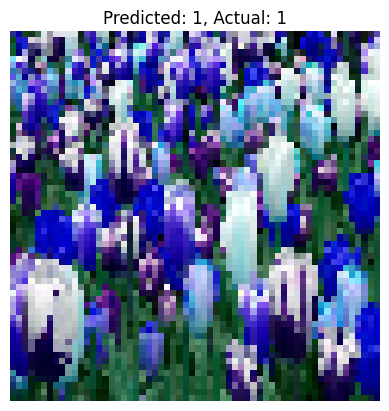

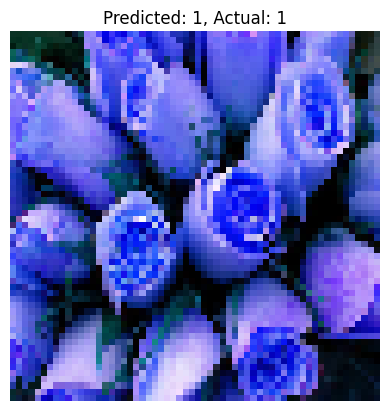

In [41]:
import matplotlib.pyplot as plt

# Number of images to display
num_images = 10  # Adjust as needed

# Make predictions
pred_y = sess.run(pred, feed_dict={x: test_x})

# Display images with their predicted labels
for i in range(num_images):
    plt.imshow(test_x[i].reshape(im_size, im_size, -1))  # Reshape if images are grayscale or RGB
    plt.title(f'Predicted: {np.argmax(pred_y[i])}, Actual: {np.argmax(test_y[i])}')
    plt.axis('off')
    plt.show()
